# Project 2
After having carefully pre-processed our dataset, we are going to train different models in order to get predictions.

To remember, our dataset gathers information about people who suffered an heart attack in the past and aims to prediction if they will survive or not after one year.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Parametric regression
For this part, we are trying to predict a continuous variable. As a consequence, we cannot use the discrete "Alive-At1" feature as output. Then, we are going to plot the correlation map and see which continuous feature is the most correlated with others in order to make more accurate predictions.

We already scaled and split our dataset in the last part of the project hence the fact that we are only working with this normalized dataset here. The train/test split was 0.7/0.3. Moreover, we knew from the Lab2 that it is desirable to use normalized dataset.

In [ ]:
train_data = pd.read_csv("minmax_scaled_x_train.csv") #We can change this database

n = 10
train_data.head(n)# Show the first individuals

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
0,0.168142,1.0,0.854876,0.0,0.238095,0.695652,0.282230,0.677419,0.601504
1,0.327434,0.0,0.716993,0.0,0.833333,0.260870,0.236934,0.419355,0.526316
2,0.002065,1.0,0.634263,1.0,0.425372,0.498555,0.548921,0.722590,0.475939
3,0.048584,1.0,0.710926,0.0,0.389048,0.215909,0.620176,0.019677,0.146618
4,0.000000,1.0,0.736608,0.0,0.469317,0.565324,0.917483,0.007061,0.392318
5,0.043533,1.0,0.441862,0.0,0.549815,0.329733,0.341200,0.425544,0.008843
6,0.345133,1.0,0.358496,0.0,0.000000,0.926087,1.000000,0.612903,0.233083
7,0.716814,0.0,0.358496,0.0,0.619048,0.326087,0.463415,0.354839,0.060150
8,0.256637,0.0,0.220613,0.0,0.445238,0.778261,0.390244,0.580645,0.135338
9,0.380531,0.0,0.661839,0.0,0.833333,0.000000,0.393728,0.161290,0.000000


## Correlation map

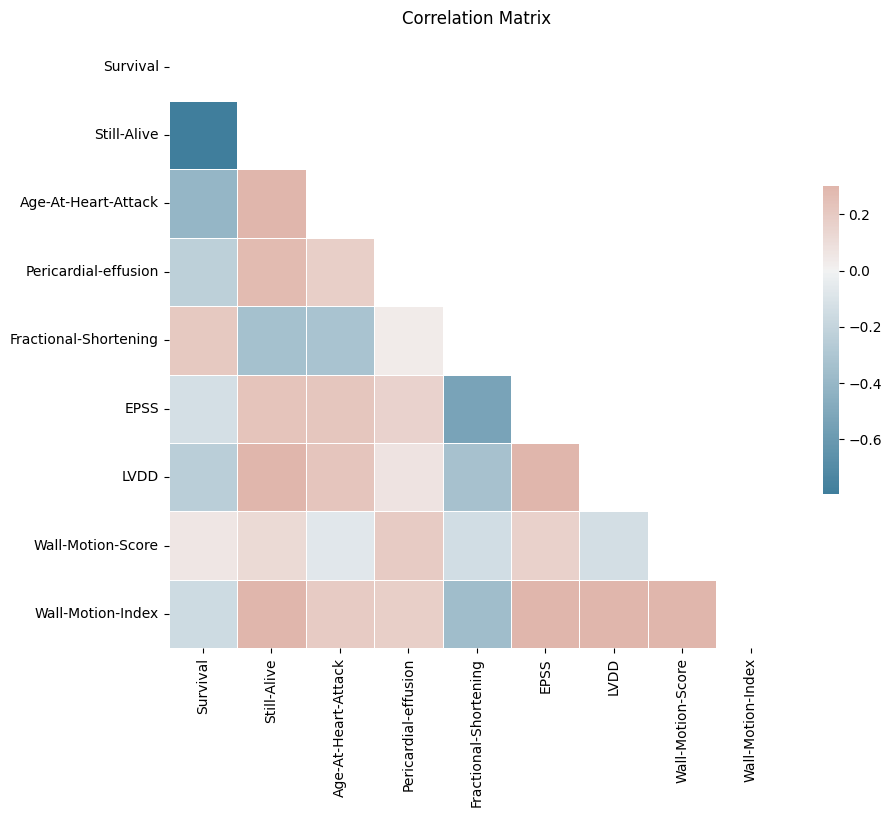

In [ ]:
corr_matrix = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")
plt.show()

As the feature "Still-Alive" takes only 0 and 1 values, we decided to take the "Wall-Motion-Index" feature as output (dependant variable) of our models.

## Simple linear regression

For this problem, we have chosen the "EPSS" feature as input of our model. Indeed, it is one of the most-correlated (and continuous) feature with the Wall-Motion-Index.

In [ ]:
X_train = train_data["EPSS"]
Y_train = train_data["Wall-Motion-Index"]

### Test set

In [ ]:
test_data = pd.read_csv("minmax_scaled_x_test.csv")
X_test = test_data["EPSS"]
Y_test = test_data["Wall-Motion-Index"]

We will need arrays to compute simple linear model so let's create them.

In [ ]:
X_train_array = np.array(X_train).reshape(-1, 1)
X_test_array = np.array(X_test).reshape(-1, 1)
Y_train_array = np.array(Y_train).reshape(-1, 1)
Y_test_array = np.array(Y_test).reshape(-1, 1)

We also need a way to keep the error values and compare the different methods later.

In [ ]:
results = pd.DataFrame(columns=['Model', 'R2', 'MSE'])

In [ ]:
# Simple linear regression - Tip: LinearRegression()
regr = LinearRegression() # Create linear regression object

regr.fit(X_train_array, Y_train_array) # Train the model using the training set, consider the feature 'Age' as the input and Glucose as the output

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
wmi_y_pred = regr.predict(X_test_array)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, wmi_y_pred)
r_squared = r2_score(Y_test, wmi_y_pred)

# add the results to the dataframe
results = results.append({'Model': 'Simple Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)

results.head()

Interception: 
 [0.02842555]
Coefficients: 
 [[0.50857121]]


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\742886111.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Simple Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411


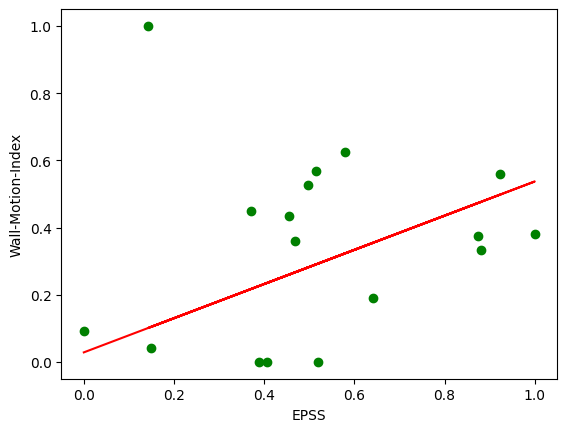

In [ ]:
# Plot the samples and the predict
plt.scatter(X_test,Y_test,color='g')
plt.plot(X_test, wmi_y_pred,color='r')
plt.xlabel('EPSS')
plt.ylabel("Wall-Motion-Index")
plt.show()

## Multiple Linear Regression with 3 input variables

Let's start the multiple linear regression with only three input variables and later increase that number to see if we can get better results. As a consequence, we use the "LVDD" and "Wall-Motion-Score" as the two new additional variables compared to simple linear regression. These variables were the most correlated with "Wall-Motion-Index".

In [ ]:
X_train = train_data.loc[:, ["EPSS", "LVDD", "Wall-Motion-Score"]]
X_test = test_data.loc[:, ["EPSS", "LVDD", "Wall-Motion-Score"]]

In [ ]:
# Show and plot the values of the coefficients. Comment the results
regr = LinearRegression() # Create linear regression object

regr.fit(X_train, Y_train)

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

results = results.append({'Model': 'Multiple (3 var) Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)

results.head()

Interception: 
 -0.26607221802452935
Coefficients: 
 [0.2961571  0.26700858 0.5987325 ]
R Squared: 0.5150415591561643 
 Mean Squared Error:0.034145982509261416


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\1987078434.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Multiple (3 var) Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146


We already remark that we obtain better results (increased R², lower MSE) using three variables than one.

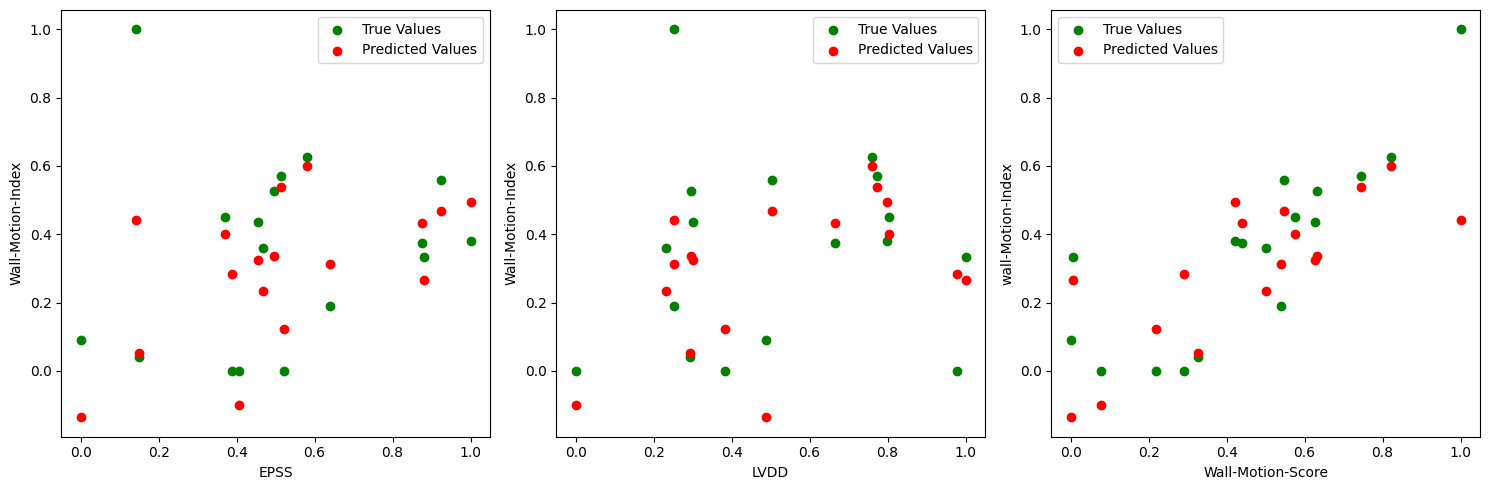

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot EPSS vs. Wall-Motion-Index
axes[0].scatter(X_test["EPSS"], Y_test, color='g', label='True Values')
axes[0].scatter(X_test["EPSS"], y_pred, color='r', label='Predicted Values')
axes[0].set_xlabel('EPSS')
axes[0].set_ylabel('Wall-Motion-Index')
axes[0].legend()

# Plot LVDD vs. Wall-Motion-Index
axes[1].scatter(X_test["LVDD"], Y_test, color='g', label='True Values')
axes[1].scatter(X_test["LVDD"], y_pred, color='r', label='Predicted Values')
axes[1].set_xlabel('LVDD')
axes[1].set_ylabel('Wall-Motion-Index')
axes[1].legend()

# Plot Wall-Motion-Score vs. Wall-Motion-Index
axes[2].scatter(X_test["Wall-Motion-Score"], Y_test, color='g', label='True Values')
axes[2].scatter(X_test["Wall-Motion-Score"], y_pred, color='r', label='Predicted Values')
axes[2].set_xlabel('Wall-Motion-Score')
axes[2].set_ylabel('wall-Motion-Index')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Multiple Linear Regression with 4 variables as input

We add another variable again to see if we can increase the R² and MSE results of our predictions.

In [ ]:
X_train = train_data.loc[:, ["EPSS", "LVDD", "Wall-Motion-Score", "Still-Alive"]]
X_test = test_data.loc[:, ["EPSS", "LVDD", "Wall-Motion-Score", "Still-Alive"]]

In [ ]:
# Show and plot the values of the coefficients. Comment the results
regr = LinearRegression() # Create linear regression object

regr.fit(X_train, Y_train)

# Show the intercept
print("Interception: \n",regr.intercept_)

# Show the coeffients
print("Coefficients: \n", regr.coef_)

# Predict using the test set
y_pred = regr.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

results = results.append({'Model': 'Multiple (4 var) Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)

results.head()

Interception: 
 -0.25768173512449494
Coefficients: 
 [0.28032864 0.18970339 0.5594566  0.10555085]
R Squared: 0.5646165187506667 
 Mean Squared Error:0.030655403604673753


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\960898687.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Multiple (4 var) Linear Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146
2,Multiple (4 var) Linear Regression,0.564617,0.030655


We can observe that adding a new variable enables us to get better performances. That is not huge, be it is all we can get.

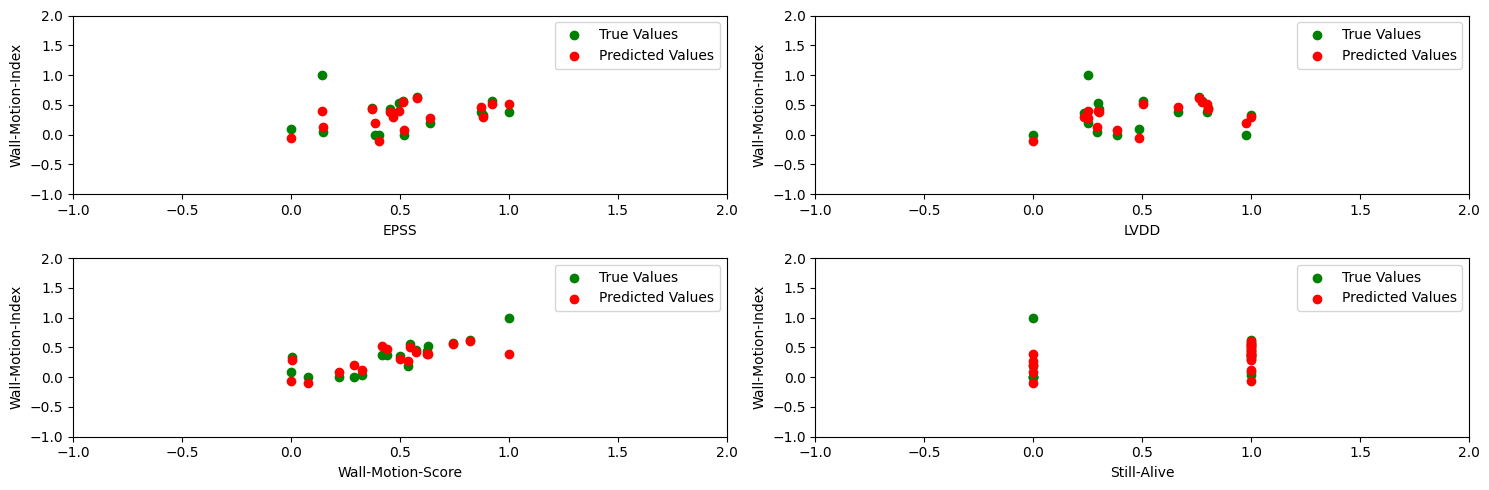

In [ ]:
def plot_multi_pred(y_pred, Y_test, X_test):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 5))

    # Plot EPSS vs. Wall-Motion-Index
    axes[0, 0].scatter(X_test["EPSS"], Y_test, color='g', label='True Values')
    axes[0, 0].scatter(X_test["EPSS"], y_pred, color='r', label='Predicted Values')
    axes[0, 0].set_xlabel('EPSS')
    axes[0, 0].set_ylabel('Wall-Motion-Index')
    axes[0, 0].set_xlim([-1, 2])
    axes[0, 0].set_ylim([-1, 2])
    axes[0, 0].legend()

    # Plot LVDD vs. Wall-Motion-Index
    axes[0, 1].scatter(X_test["LVDD"], Y_test, color='g', label='True Values')
    axes[0, 1].scatter(X_test["LVDD"], y_pred, color='r', label='Predicted Values')
    axes[0, 1].set_xlabel('LVDD')
    axes[0, 1].set_ylabel('Wall-Motion-Index')
    axes[0, 1].set_xlim([-1, 2])
    axes[0, 1].set_ylim([-1, 2])
    axes[0, 1].legend()

    # Plot Wall-Motion-Score vs. Wall-Motion-Index
    axes[1, 0].scatter(X_test["Wall-Motion-Score"], Y_test, color='g', label='True Values')
    axes[1, 0].scatter(X_test["Wall-Motion-Score"], y_pred, color='r', label='Predicted Values')
    axes[1, 0].set_xlabel('Wall-Motion-Score')
    axes[1, 0].set_ylabel('Wall-Motion-Index')
    axes[1, 0].set_xlim([-1, 2])
    axes[1, 0].set_ylim([-1, 2])
    axes[1, 0].legend()

    # Plot Still-Alive vs. Wall-Motion-Index
    axes[1, 1].scatter(X_test["Still-Alive"], Y_test, color='g', label='True Values')
    axes[1, 1].scatter(X_test["Still-Alive"], y_pred, color='r', label='Predicted Values')
    axes[1, 1].set_xlabel('Still-Alive')
    axes[1, 1].set_ylabel('Wall-Motion-Index')
    axes[1, 1].set_xlim([-1, 2])
    axes[1, 1].set_ylim([-1, 2])
    axes[1, 1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

plot_multi_pred(y_pred, Y_test, X_test)

## Ordinary Least Square Multiple regression
Here we try the classic least square regression model (polynomial of degree 2) using four variables.

In [ ]:
import statsmodels.api as sm
mod = sm.OLS(Y_train, X_train)

res = mod.fit()
y_pred = res.predict(X_test)

# Compute R2, MAE, MSE and RMSE
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')

results = results.append({'Model': 'Multiple (4 var) Least Square Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)

results.head()

R Squared: 0.4864132120518454 
 Mean Squared Error:0.036161707893465886


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2303569405.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Multiple (4 var) Least Square Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146
2,Multiple (4 var) Linear Regression,0.564617,0.030655
3,Multiple (4 var) Least Square Regression,0.486413,0.036162


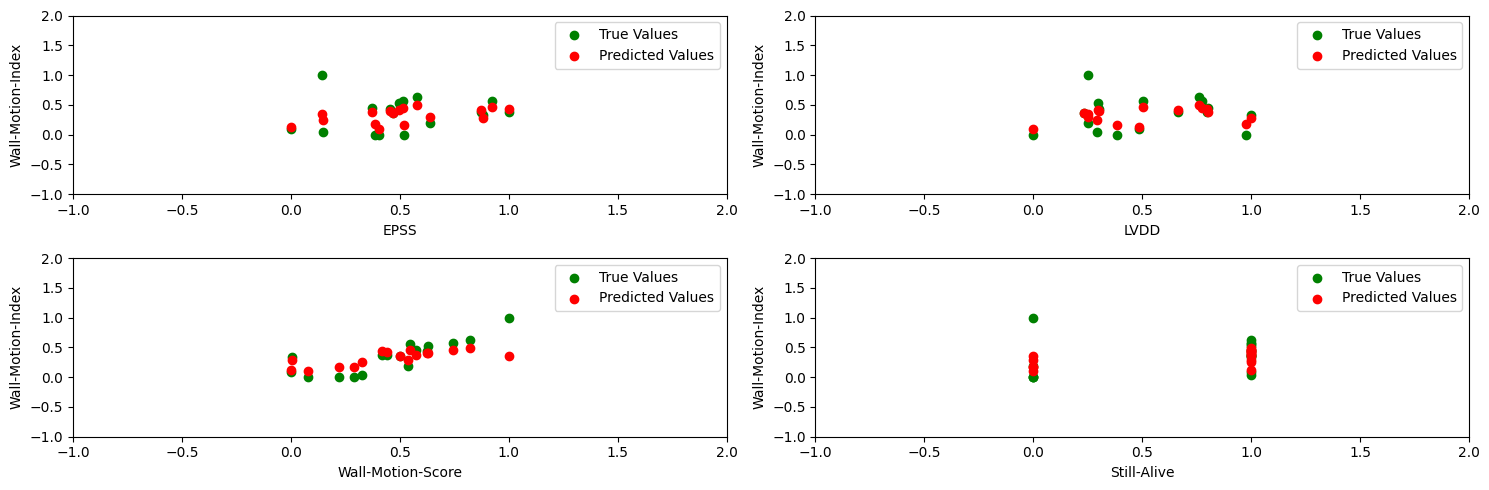

In [ ]:
plot_multi_pred(y_pred, Y_test, X_test)

As we can observe in the plots, our data seems distributed linearly which is why the least square model does not really fit with it.

## Multiple Polynomial Regression

In [ ]:
# concatenate X_train and X_test to get inputs
X = pd.concat([X_train, X_test], axis=0)
# concatenate Y_train and Y_test to get outputs
Y = pd.concat([Y_train, Y_test], axis=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Define the degree of the polynomial
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

# Define a range of polynomial degrees to try
degrees = [1, 2, 3, 4, 5] # we don't test -1 degree because we know (correlation) that variables are not inversely correlated

# Initialize an empty list to store cross-validation scores
cv_scores = {'r2': [], 'neg_mean_squared_error': []}

for degree in degrees:
    # Create a pipeline that includes polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0) # perform the 3-fold, no need to use KFold

    # Perform 3-fold cross-validation
    cv_score = cross_validate(model, X, Y, cv=cv, scoring=['r2', 'neg_mean_squared_error'])
    # Append the cross-validation score to the list
    cv_scores['r2'].append(np.mean(cv_score['test_r2']))
    cv_scores['neg_mean_squared_error'].append(-1*np.mean(cv_score['test_neg_mean_squared_error']))


# Find the best degree based on r2 and neg_mse
best_r2_degree = degrees[cv_scores['r2'].index(max(cv_scores['r2']))]
best_mse_degree = degrees[cv_scores['neg_mean_squared_error'].index(min(cv_scores['neg_mean_squared_error']))]

# Print the results
print(f'Cross-validation scores for different degrees: {cv_scores}')

print(f'Best degree according to r2: {best_r2_degree}')
print(f'Best degree according to MSE: {best_mse_degree}')



Cross-validation scores for different degrees: {'r2': [0.13955588838260002, 0.285893097472834, -0.6994208680979824, -25269.35567008921, -2944.697404822862], 'neg_mean_squared_error': [0.04357426900371974, 0.03256044386791325, 0.07764003244469857, 1456.6918988140171, 161.22438456024295]}
Best degree according to r2: 2
Best degree according to MSE: 2


In [ ]:
r_squared = cv_scores['r2'][1]
mse = cv_scores['neg_mean_squared_error'][1]
results = results.append({'Model': 'Multiple (4 var) Polynomial (2) Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)
results.head()

C:\Users\flore\AppData\Local\Temp\ipykernel_17512\1335322137.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Multiple (4 var) Polynomial (2) Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146
2,Multiple (4 var) Linear Regression,0.564617,0.030655
3,Multiple (4 var) Least Square Regression,0.486413,0.036162
4,Multiple (4 var) Polynomial (2) Regression,0.285893,0.032560


Here, the best polynomial degree in terms of R² and MSE is the second. However, it produces the poorest values for a multi-variable model so far.

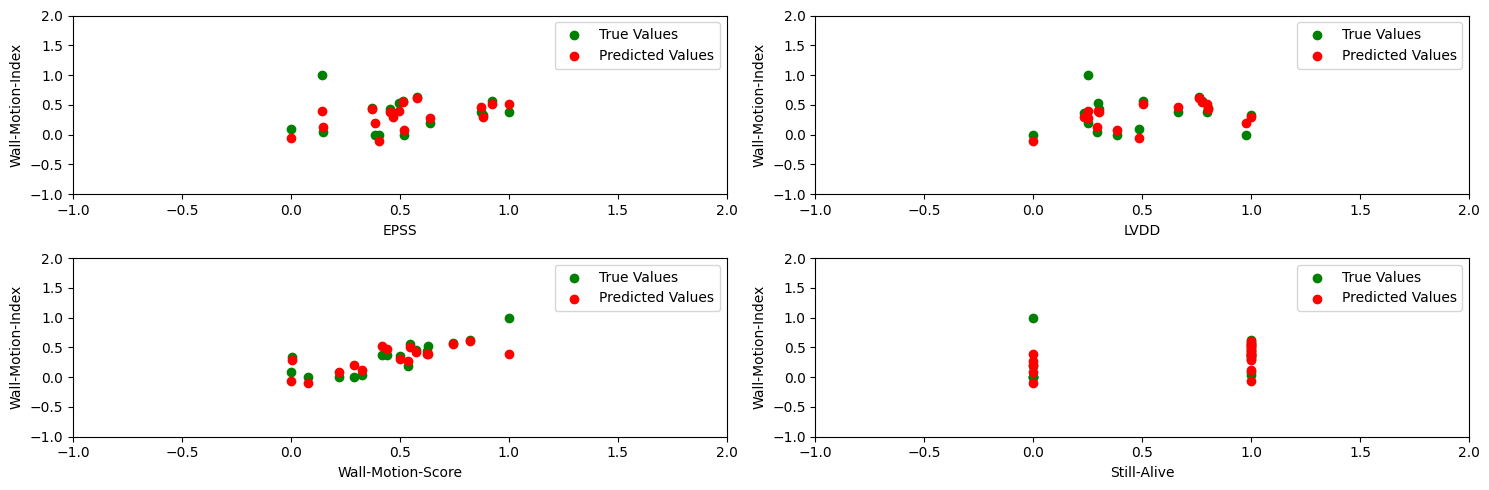

Polynomial Regression with degree 1


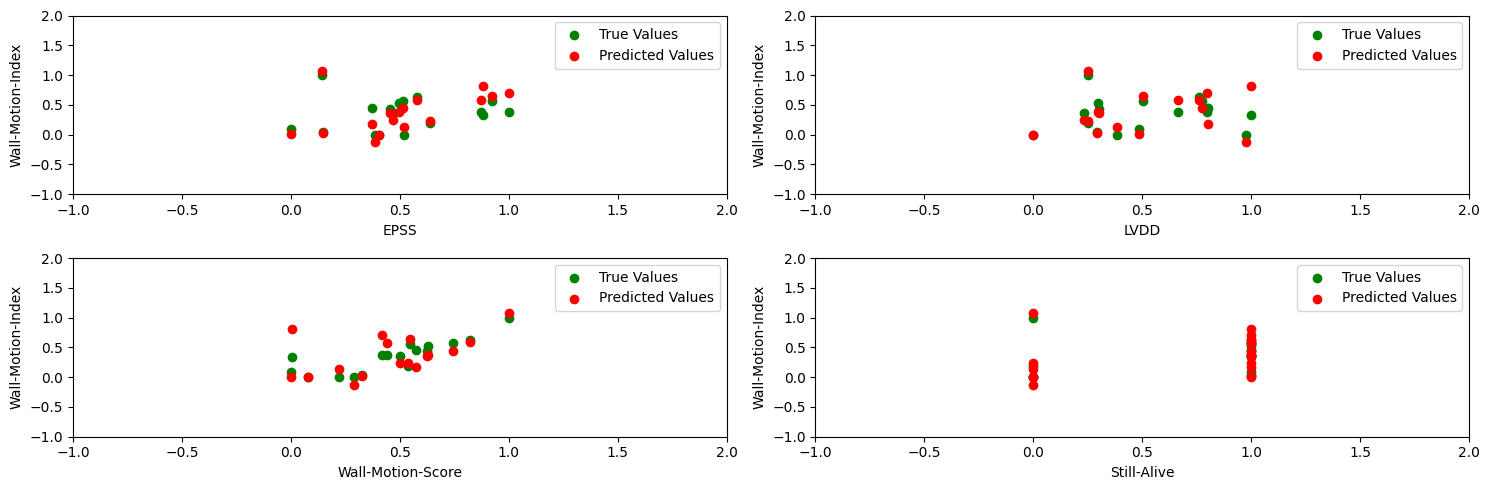

Polynomial Regression with degree 2


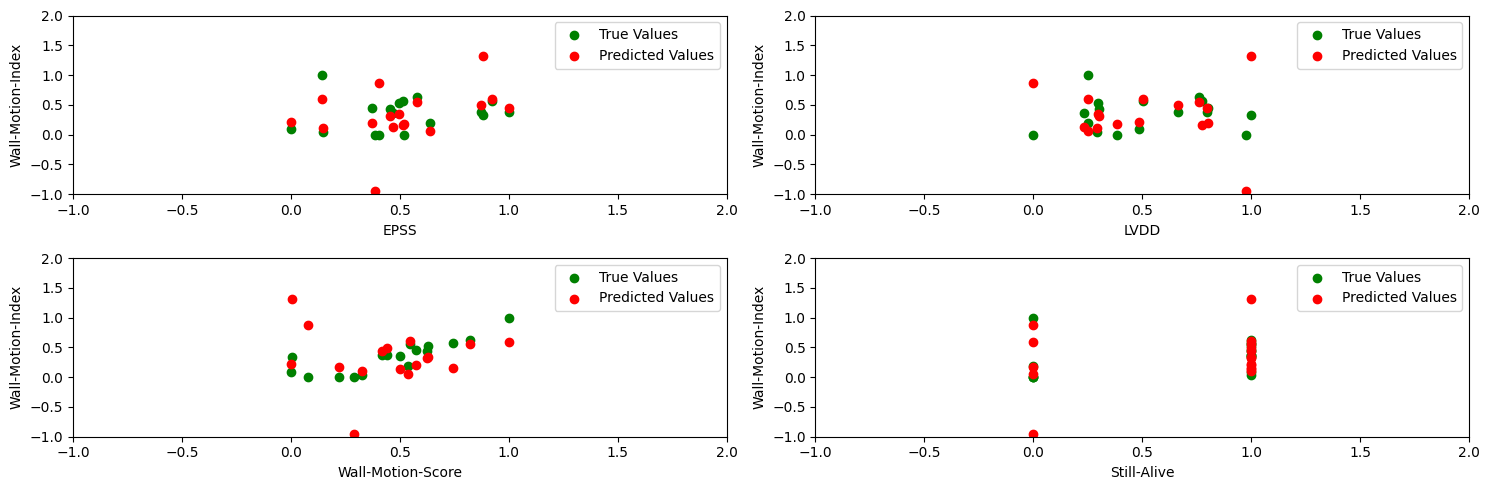

Polynomial Regression with degree 3


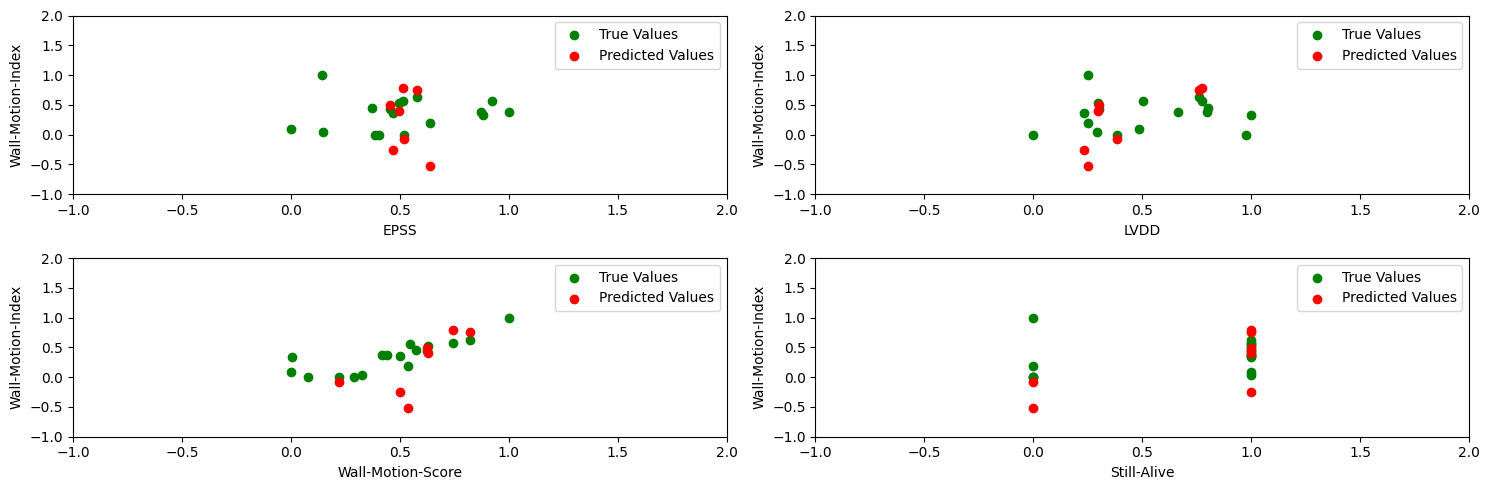

Polynomial Regression with degree 4


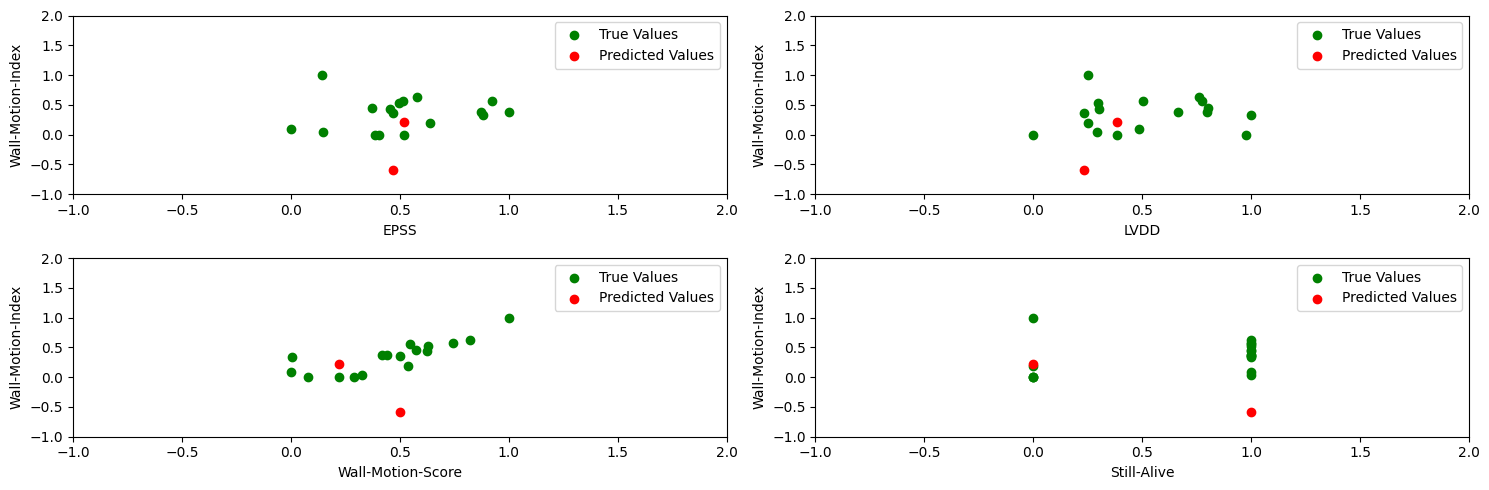

Polynomial Regression with degree 5


In [ ]:
for degree in degrees:
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model on the entire dataset (for simplicity in this example)
    model.fit(X_train, Y_train)

    # Predict using the model
    y_pred = model.predict(X_test)

    plot_multi_pred(y_pred, Y_test, X_test)
    print(f'Polynomial Regression with degree {degree}')

## Linear regression with regularizer
As our data is linearly distributed and that linear models produce the best results so far, let's try to improve those results by using regularizers.
### Ridge regression
Firstly, let's try the Ridge regularizer which is based on the l2 regularisation:
$\hat{x} = argmin ||y - Ax||^2_2 + \alpha||x||^2_2$

We test different alpha values to see which one allows the best convergence.


In [ ]:
# Use a Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

# Values for alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Use grid search for ridge regression and then train and predict
svc = Ridge()
clf = GridSearchCV(svc, parameters, cv=cv)# cv allows to define the cross-validation splitting strategy
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

# Which is the best value of the regularization parameter?
print("Best parameter: ", clf.best_params_)

# provide R2, MAE, MSE, RMSE values
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)

print(f'R Squared: {r_squared} \nMean Squared Error: {mse}')

results = results.append({'Model': 'Multiple (4 var) Ridge Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)
results.head(6)

Best parameter:  {'alpha': 0.01}
R Squared: 0.5640007807564514 
Mean Squared Error: 0.030698757791362774


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2894267342.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Multiple (4 var) Ridge Regression', 'R2': r_squared, 'MSE': mse}, ignore_index=True)


,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146
2,Multiple (4 var) Linear Regression,0.564617,0.030655
3,Multiple (4 var) Least Square Regression,0.486413,0.036162
4,Multiple (4 var) Polynomial (2) Regression,0.285893,0.032560
5,Multiple (4 var) Ridge Regression,0.564001,0.030699


With $\alpha = 0.01$, we obtain the best results which are quite similar than those provided by the classic multiple linear regression.

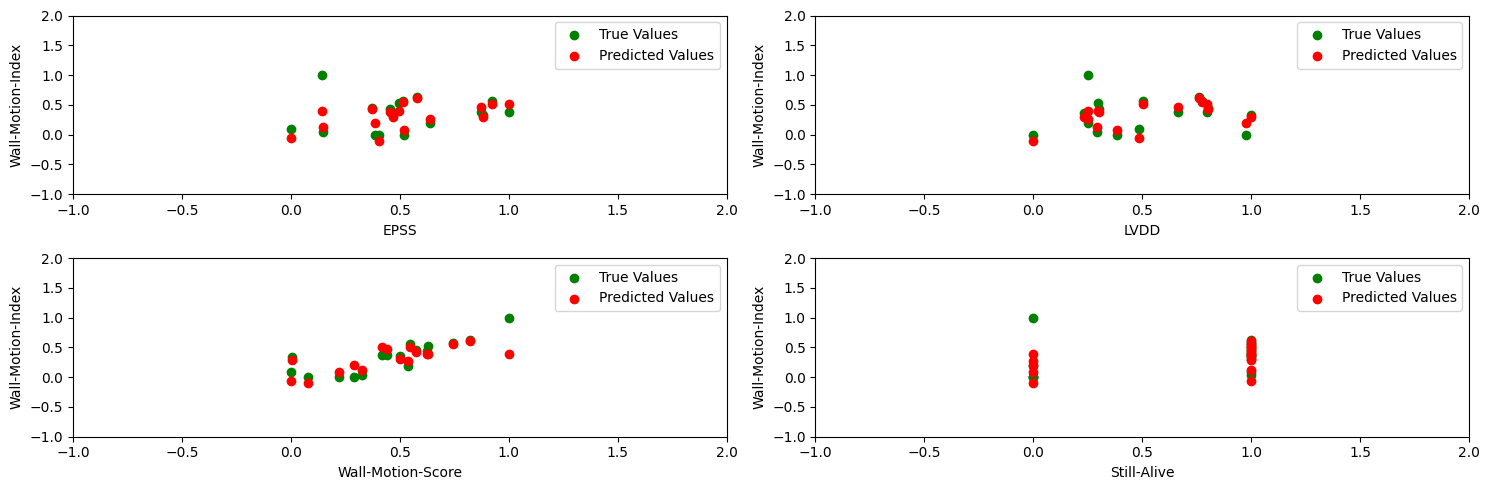

In [ ]:
plot_multi_pred(y_pred, Y_test, X_test)

# Lasso Regression
Let's try now the Lasso regression which is based on the l1 minimization:
$\hat{x} = argmin \frac{1}{2N} ||y - Ax||^2_2 + \alpha||x||_1$

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso_regression = Lasso()

# Values for alpha
parameters = {"alpha":[1e-4, 0.01, 1, 5, 10, 20]}

svc = Lasso()

clf = GridSearchCV(svc, parameters, cv=cv) # cv allows to define the cross-validation splitting strategy
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

# Which is the best value of the regularization parameter?
print("Best parameter: ", clf.best_params_)

# provide R2, MAE, MSE, RMSE values
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)

print(f'R Squared: {r_squared} \nMean Squared Error: {mse}')

Best parameter:  {'alpha': 0.0001}
R Squared: 0.5646842198374513 
Mean Squared Error: 0.030650636762960093


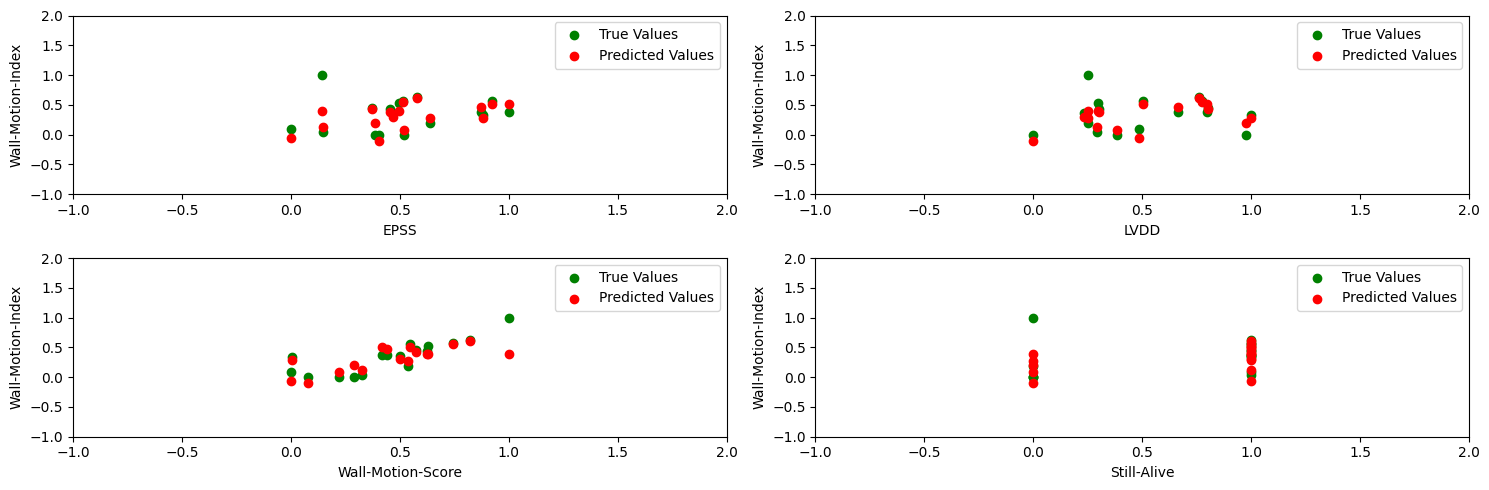

In [ ]:
plot_multi_pred(y_pred, Y_test, X_test)

In [ ]:
new_results = pd.DataFrame({'Model': ['Multiple (4 var) Lasso Regression'], 'R2': [r_squared], 'MSE': [mse]})

# Concatenate the new results with the existing DataFrame
results = pd.concat([results, new_results], ignore_index=True)

results.head(10)

,Model,R2,MSE
0,Simple Linear Regression,-0.184648,0.083411
1,Multiple (3 var) Linear Regression,0.515042,0.034146
2,Multiple (4 var) Linear Regression,0.564617,0.030655
3,Multiple (4 var) Least Square Regression,0.486413,0.036162
4,Multiple (4 var) Polynomial (2) Regression,0.285893,0.032560
5,Multiple (4 var) Ridge Regression,0.564001,0.030699
6,Multiple (4 var) Lasso Regression,0.564684,0.030651


By adding this regularization, we enforce sparsity in the solutions of the minimization. This way, fewer coefficients are potential solutions and we get to improve the convergence ouf our model. However, this is based on the assumption that our data is sparse (has a lot of zero) which is not the case here! That is why linear regression with regularization does not produce better results than the classic linear regression.

# Parametric classification

Here we addressing a classification problem. In our case, it would be predicting if the patient are alive (1) or not (0) after one year. As consequence, the outputs ouf our model will be the "Alive-At1" feature.

In [ ]:
X_train = pd.read_csv("minmax_scaled_x_train.csv") # already normalized
X_test = pd.read_csv("minmax_scaled_x_test.csv") # already normalized
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")

For that classification issue, we will now use different metrics than for regression.

In [ ]:
results = pd.DataFrame(columns=['Accuracy', 'Specificity', 'Sensitivity'])

## Logistic regression
As our output changed, we need to plot again the correlation map in order to see the correlation between the different features.

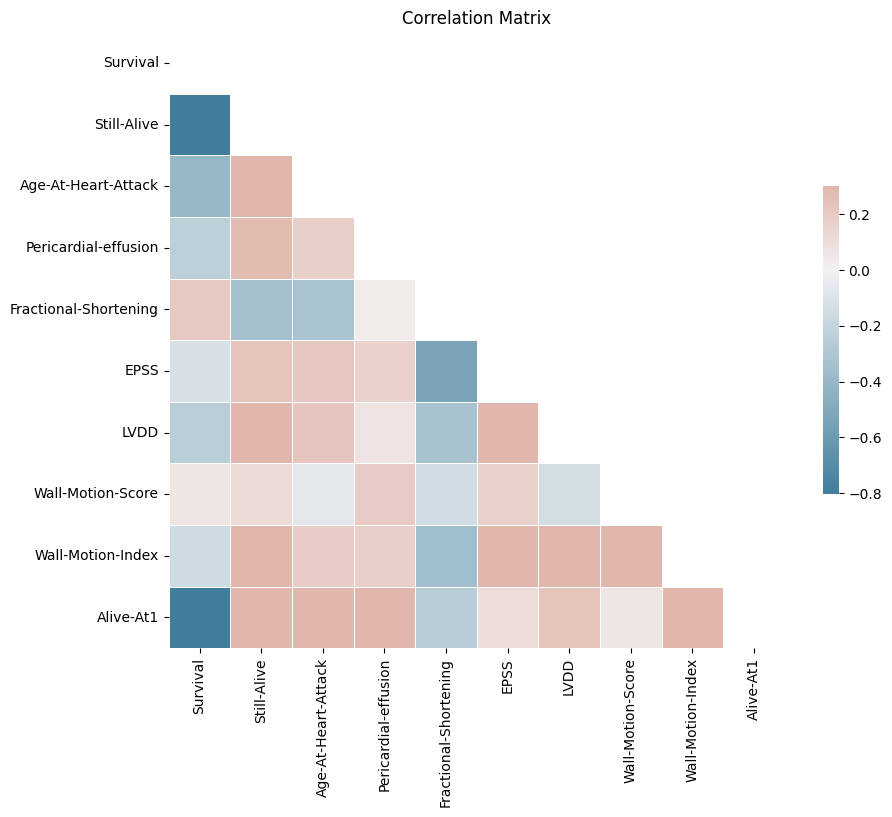

In [ ]:
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)
corr_matrix = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix")
plt.show()

We can observe that the "Alive-At1" feature is highly inversely correlated with the "Survival" feature. Let's consider that one as input of the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(penalty="none")

# Train the model using X_train using only the feature 'Age-At-Heart-Attack' as the input
regressor = regressor.fit(np.array(X_train['Survival']).reshape(-1, 1), Y_train)

# Show the intercept
print("Intercept:", regressor.intercept_)

# Show the coefficients
print("Coefficients:", regressor.coef_)


# Predic the values using the test set. Obtain both the hard and the soft output
y_pred = regressor.predict(np.array(X_test['Survival']).reshape(-1, 1))
y_prob_pred = regressor.predict_proba(np.array(X_test['Survival']).reshape(-1, 1))

print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')

Intercept: [67.468723]
Coefficients: [[-401.27107519]]
Y_pred: [1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.] 
y_prob_pred: [[2.22044605e-016 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.84641434e-102]
 [1.00000000e+000 1.34885703e-042]
 [1.00000000e+000 1.07517806e-145]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.42132412e-052]
 [1.00000000e+000 3.52072696e-079]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [2.22044605e-015 1.00000000e+000]
 [1.00000000e+000 1.21481880e-022]
 [1.00000000e+000 9.68335783e-126]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]] 


c:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


def compute_results(Y_test, y_pred, results, model_name):
    #  Compute the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]

    # Compute the accuracy
    Accuracy = accuracy_score(Y_test, y_pred)
    print(f'Accuracy: {Accuracy}')


    #Sensibility/ sensitivity/ recall
    Sensibility = recall_score(Y_test, y_pred)
    print(f'Sensibility: {Sensibility}')

    # Specificity
    specificity = tn / (tn + fp)
    print(f'Specificity: {specificity}')

    print(classification_report(Y_test, y_pred))

    results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)
    return results

results = compute_results(Y_test, y_pred, results, 'Simple Logistic Regression - Survival')
results.head()

Accuracy: 1.0
Sensibility: 1.0
Specificity: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


,Accuracy,Specificity,Sensitivity,Model
0,1.0,1.0,1.0,Simple Logistic Regression - Survival


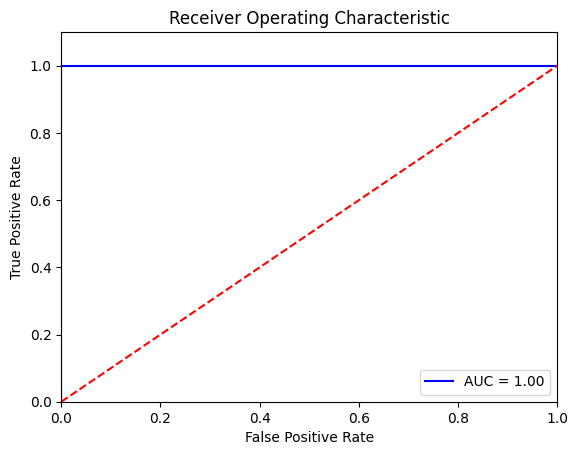

In [ ]:
from sklearn.metrics import auc, roc_curve

def plot_roc(Y_test, y_pred):

    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(Y_test, y_pred)


It seems that the classification task is really easy! Problem, we are using the number of month that each patient survived in order to predict if he is alive 1 year after the heart attack. This has no sense! Indeed, the authors of the dataset assert that the "Survival" feature cannot be used. Let's use "Age-at-heart-attack" feature as input.

### Age-at-heart-attack

In [ ]:
regressor = LogisticRegression(penalty="none")

# Train the model using X_train using only the feature 'Age-At-Heart-Attack' as the input
regressor = regressor.fit(np.array(X_train['Age-At-Heart-Attack']).reshape(-1, 1), Y_train)

# Show the intercept
print("Intercept:", regressor.intercept_)

# Show the coefficients
print("Coefficients:", regressor.coef_)


# Predic the values using the test set. Obtain both the hard and the soft output
y_pred = regressor.predict(np.array(X_test['Age-At-Heart-Attack']).reshape(-1, 1))
y_prob_pred = regressor.predict_proba(np.array(X_test['Age-At-Heart-Attack']).reshape(-1, 1))

print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')

Intercept: [-3.44873499]
Coefficients: [[5.7839158]]
Y_pred: [1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.] 
y_prob_pred: [[0.15438911 0.84561089]
 [0.65702535 0.34297465]
 [0.25990547 0.74009453]
 [0.42976167 0.57023833]
 [0.77026353 0.22973647]
 [0.9252452  0.0747548 ]
 [0.74414004 0.25585996]
 [0.96919339 0.03080661]
 [0.95587409 0.04412591]
 [0.08825091 0.91174909]
 [0.11596883 0.88403117]
 [0.49465495 0.50534505]
 [0.80160847 0.19839153]
 [0.61384133 0.38615867]
 [0.80160847 0.19839153]
 [0.70815708 0.29184292]
 [0.55203782 0.44796218]] 


c:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
results = compute_results(Y_test, y_pred, results, 'Simple Logistic Regression (Age-At-Heart-Attack)')
results.head()

Accuracy: 0.6470588235294118
Sensibility: 0.5
Specificity: 0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.55      0.86      0.67         7
         1.0       0.83      0.50      0.62        10

    accuracy                           0.65        17
   macro avg       0.69      0.68      0.65        17
weighted avg       0.71      0.65      0.64        17



C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


,Accuracy,Specificity,Sensitivity,Model
0,1.000000,1.000000,1.0,Simple Logistic Regression - Survival
1,0.647059,0.857143,0.5,Simple Logistic Regression (Age-At-Heart-Attack)


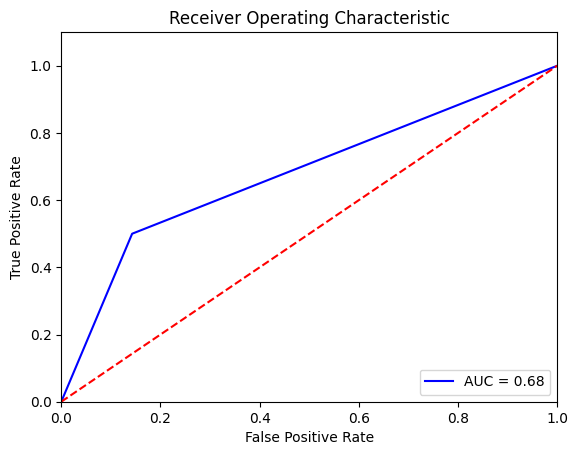

In [ ]:
plot_roc(Y_test, y_pred)

## Multivariable logistic regression
### Using 3 input variables
Here we are adding other variables that are correlated with the "Alive-At1" feature.
Pericardial-Effusion & Wall-Motion-Index

In [ ]:
X_train = train_data.loc[:, ["Age-At-Heart-Attack", "Pericardial-effusion", "Wall-Motion-Index"]]
X_test = test_data.loc[:, ["Age-At-Heart-Attack", "Pericardial-effusion", "Wall-Motion-Index"]]

In [ ]:
multi_regressor = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty="none")

# Train the model using the training data
multi_regressor.fit(X_train, Y_train)

# Show the intercept
print("Interception:", multi_regressor.intercept_)

# Show the coefficients
print("Coefficients:", multi_regressor.coef_)

# Compute the predicted values for the test set
y_pred = multi_regressor.predict(X_test)

Interception: [-2.18074004]
Coefficients: [[2.89981587 0.77532167 0.97569838]]


c:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


Accuracy: 0.7647058823529411
Sensibility: 0.7
Specificity: 0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75         7
         1.0       0.88      0.70      0.78        10

    accuracy                           0.76        17
   macro avg       0.77      0.78      0.76        17
weighted avg       0.79      0.76      0.77        17



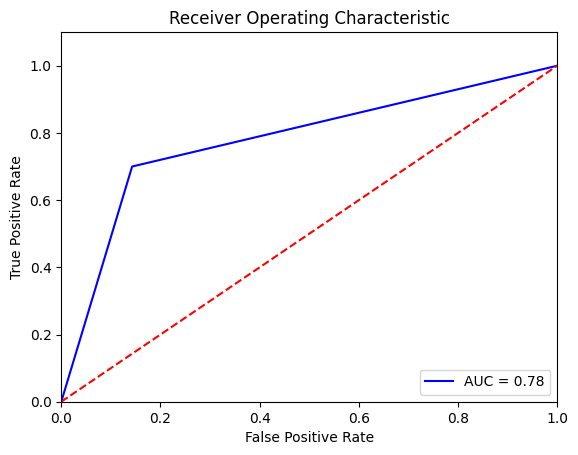

In [ ]:
results = compute_results(Y_test, y_pred, results, 'Multi (3) Logistic Regression')

plot_roc(Y_test, y_pred)

In [ ]:
results.head()

,Accuracy,Specificity,Sensitivity,Model
0,1.000000,1.000000,1.0,Simple Logistic Regression - Survival
1,0.647059,0.857143,0.5,Simple Logistic Regression (Age-At-Heart-Attack)
2,0.764706,0.857143,0.7,Multi (3) Logistic Regression


### Multiple logistic regression using 4 input variables

In [ ]:
X_train = train_data.loc[:, ["Age-At-Heart-Attack", "Pericardial-effusion", "Wall-Motion-Index", "LVDD"]]
X_test = test_data.loc[:, ["Age-At-Heart-Attack", "Pericardial-effusion", "Wall-Motion-Index", "LVDD"]]

In [ ]:
multi_regressor = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty="none")

# Train the model using the training data
multi_regressor.fit(X_train, Y_train)

# Show the intercept
print("Interception:", multi_regressor.intercept_)

# Show the coefficients
print("Coefficients:", multi_regressor.coef_)

# Compute the predicted values for the test set
y_pred = multi_regressor.predict(X_test)

Interception: [-2.31968996]
Coefficients: [[2.83939524 0.80184475 0.85580754 0.42384865]]


c:\Users\flore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7647058823529411
Sensibility: 0.7
Specificity: 0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75         7
         1.0       0.88      0.70      0.78        10

    accuracy                           0.76        17
   macro avg       0.77      0.78      0.76        17
weighted avg       0.79      0.76      0.77        17



C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


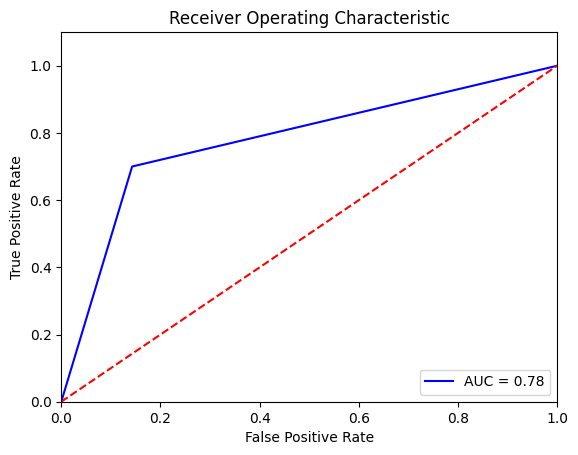

In [ ]:
results = compute_results(Y_test, y_pred, results, 'Multi (4) Logistic Regression')
results.head()
plot_roc(Y_test, y_pred)

## Logistic regression with regularization
### L2 regularizer (RIDGE)

Best parameters: {'C': 0.7071636363636363, 'penalty': 'l2'}
Best recall during training: 0.7095238095238096
Accuracy: 0.7058823529411765
Sensibility: 0.6
Specificity: 0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.60      0.86      0.71         7
         1.0       0.86      0.60      0.71        10

    accuracy                           0.71        17
   macro avg       0.73      0.73      0.71        17
weighted avg       0.75      0.71      0.71        17



C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


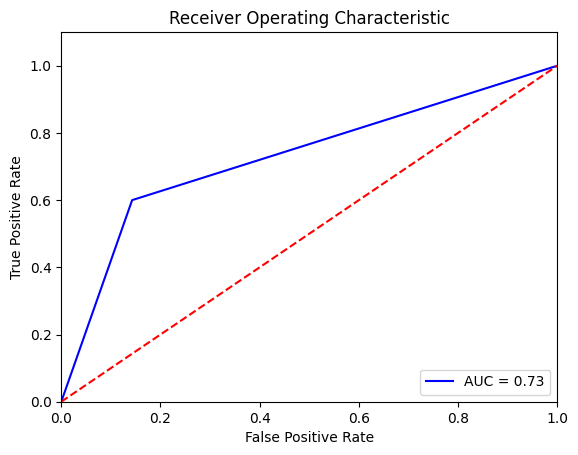

In [ ]:
# Logistic regression
from sklearn.model_selection import GridSearchCV

# C values and penalty
parameters = {"C":np.linspace(1e-4,10,100), "penalty":["l2"]}#  l2 ridge

# Logistic regression model
model = LogisticRegression( solver='lbfgs')

# Grid search
clf = GridSearchCV(model, parameters, scoring='recall')

# Train using X_train
clf.fit(X_train, Y_train.values.reshape(-1))

# We show the best value of the parameter and the score
print("Best parameters:", clf.best_params_)
print("Best recall during training:", clf.best_score_)

# The predicted output is obtained
y_pred = clf.predict(X_test)

results = compute_results(Y_test, y_pred, results, 'Multi (4) LR with Ridge regularizer')

plot_roc(Y_test, y_pred)

### L1-norm (LASSO)
liblinear optimizer restriction

Best training parameters: {'C': 0.9091818181818182, 'penalty': 'l1'}
Best recall score during training: 0.7428571428571429
Accuracy: 0.7647058823529411
Sensibility: 0.7
Specificity: 0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75         7
         1.0       0.88      0.70      0.78        10

    accuracy                           0.76        17
   macro avg       0.77      0.78      0.76        17
weighted avg       0.79      0.76      0.77        17



C:\Users\flore\AppData\Local\Temp\ipykernel_17512\2174734529.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': Accuracy, 'Specificity': specificity, 'Sensitivity': Sensibility}, ignore_index=True)


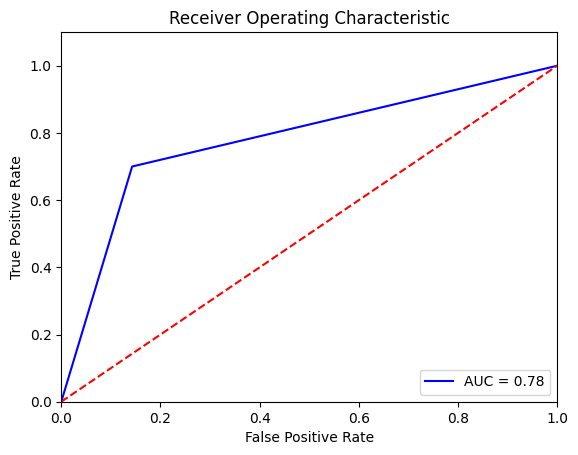

In [ ]:
# C values and penalty
parameters = {"C":np.linspace(1e-4,10,100), "penalty":["l1"]}# l1 lasso

# Logistic regression model
model = LogisticRegression(solver='liblinear')

# Grid search
clf = GridSearchCV(model, parameters, scoring='recall') # test accuracy also
# recall = 0.743
# accuracy = 0.754
# Train using X_train
clf.fit(X_train, Y_train.values.reshape(-1))


# We show the best value of the parameter and the score
print("Best training parameters:", clf.best_params_)
print("Best recall score during training:", clf.best_score_)


# The predicted output is obtained
y_pred = clf.predict(X_test)

results = compute_results(Y_test, y_pred, results, 'Multi (4) LR with Lasso regularizer')

plot_roc(Y_test, y_pred)

## Classification results

In [ ]:
results.head(10)

,Accuracy,Specificity,Sensitivity,Model
0,1.000000,1.000000,1.0,Simple Logistic Regression - Survival
1,0.647059,0.857143,0.5,Simple Logistic Regression (Age-At-Heart-Attack)
2,0.764706,0.857143,0.7,Multi (3) Logistic Regression
3,0.764706,0.857143,0.7,Multi (4) Logistic Regression
4,0.705882,0.857143,0.6,Multi (4) LR with Ridge regularizer
5,0.764706,0.857143,0.7,Multi (4) LR with Lasso regularizer
